In [4]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.fubini_study, qtm.encoding
import importlib
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.qtm_nqubit)

<module 'qtm.qtm_nqubit' from '..\\qtm\\qtm_nqubit.py'>

In [5]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 1
thetas_origin = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)
# For determine GHZ state
theta = np.random.uniform(0, 2*np.pi)

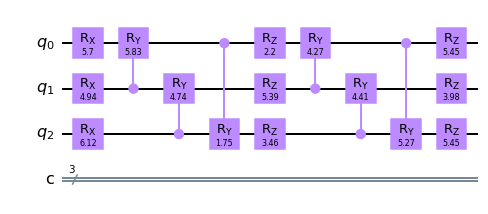

In [7]:
# GHZ
thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_binho_state(qc, thetas, num_layers)
qc.draw('mpl')
# loss_values_ghz = []
# thetass_ghz = []
# for i in range(0, 100):
#     G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
#     grad_loss = qtm.base_qtm.grad_loss(
#         qc, 
#         qtm.qtm_nqubit.create_GHZchecker_koczor, 
#         thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
#     thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
#     qc_copy = qtm.qtm_nqubit.create_GHZchecker_koczor(qc.copy(), thetas, num_layers, theta)
#     loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
#     loss_values_ghz.append(loss)
#     thetass_ghz.append(thetas)



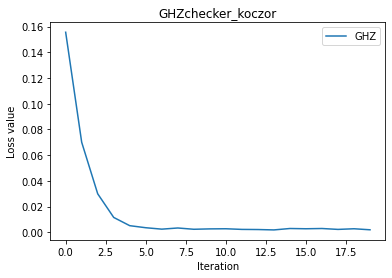

In [7]:

# Plot loss value in 100 steps
plt.plot(loss_values_ghz[0:20], label='GHZ', linestyle = '-')
plt.title('GHZchecker_koczor')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('GHZchecker_koczor.png', format='png', dpi=600)
plt.show()

In [8]:
traces_ghz, fidelities_ghz = [], []
for thetas in thetass_ghz:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_koczor_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_ghz.append(trace)
    fidelities_ghz.append(fidelity)

In [11]:
# Plot loss value in 100 steps
np.savetxt("./loss_values_ghz.csv", loss_values_ghz, delimiter=",")
np.savetxt("./thetass_ghz.csv", thetass_ghz, delimiter=",")
np.savetxt("./traces_ghz.csv", traces_ghz, delimiter=",")
np.savetxt("./fidelities_ghz.csv", fidelities_ghz, delimiter=",")


In [23]:
# W

thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_w = []
thetass_w = []
for i in range(0, 100):
    G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_Wchecker_koczor, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_Wchecker_koczor(qc.copy(), thetas, num_layers, theta)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_w.append(loss)
    thetass_w.append(thetas)



In [31]:
import qtm.custom_gate
traces_w, fidelities_w = [], []
for thetas in thetass_w:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_koczor_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_w_state_3qubit_inverse(qc1, theta).inverse()
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_w.append(trace)
    fidelities_w.append(fidelity)

In [34]:
np.savetxt("./loss_values_w.csv", loss_values_w, delimiter=",")
np.savetxt("./thetass_w.csv", thetass_w, delimiter=",")
np.savetxt("./traces_w.csv", traces_w, delimiter=",")
np.savetxt("./fidelities_w.csv", fidelities_w, delimiter=",")

In [74]:
# Haar

thetas = thetas_origin.copy()
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')

loss_values_haar = []
thetass_haar = []
for i in range(0, 100):
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
    qc = encoder.qcircuit
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_haarchecker_koczor, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, encoder = encoder)
    
    print(grad_loss)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_haarchecker_koczor(qc.copy(), thetas, num_layers, encoder)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_haar.append(loss)
    thetass_haar.append(thetas)


[ 0.0876   0.10205 -0.02935 -0.0135  -0.11365 -0.02125  0.0257   0.0384
  0.15995  0.0128   0.0114   0.0696   0.1726   0.0585   0.17325]
[ 0.07725  0.12175 -0.0896  -0.02095 -0.088   -0.0177   0.03395  0.0209
  0.17315  0.00435  0.01335  0.09285  0.1897   0.04275  0.1898 ]
[ 0.0673   0.10295 -0.1714  -0.02395 -0.0328  -0.0011   0.0327   0.0031
  0.16605 -0.0005   0.0285   0.1177   0.1757   0.02595  0.1767 ]
[ 0.0852   0.02555 -0.21515 -0.02115  0.033    0.0113   0.03515  0.00385
  0.12165 -0.00715  0.0428   0.13395  0.1142   0.0265   0.12985]
[ 0.164   -0.06825 -0.19455 -0.0137   0.0576   0.00685  0.01825 -0.0063
  0.0792  -0.00495  0.0646   0.11825  0.032    0.0144   0.0828 ]
[ 0.16415  0.0505  -0.1385  -0.0168   0.0354   0.0716   0.0984  -0.0533
  0.0123  -0.0239   0.0203   0.05545  0.0133   0.04905  0.00315]
[-0.04235 -0.0216  -0.0894  -0.01515  0.0465  -0.12655 -0.15135  0.05465
  0.0354   0.0092   0.1551   0.02655  0.04165 -0.0794   0.04385]
[ 0.2126  -0.0561  -0.07285 -0.0152   0

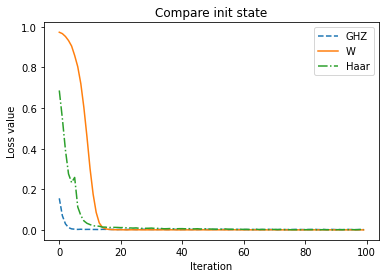

In [78]:

# Plot loss value in 100 steps
plt.plot(loss_values_ghz, label='GHZ', linestyle = '--')
plt.plot(loss_values_w, label='W', linestyle = '-')
plt.plot(loss_values_haar, label='Haar', linestyle = '-.')
plt.title('Compare init state')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('Compare_init_state.png', format='png', dpi=600)
plt.show()

In [79]:
traces_haar, fidelities_haar = [], []
for thetas in thetass_haar:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_koczor_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = encoder.qcircuit
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_haar.append(trace)
    fidelities_haar.append(fidelity)

In [82]:
np.savetxt("./loss_values_haar.csv", loss_values_haar, delimiter=",")
np.savetxt("./thetass_haar.csv", thetass_haar, delimiter=",")
np.savetxt("./traces_haar.csv", traces_haar, delimiter=",")
np.savetxt("./fidelities_haar.csv", fidelities_haar, delimiter=",")

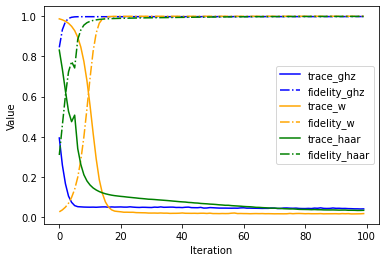

In [89]:
plt.plot(traces_ghz, label = 'trace_ghz', color = 'blue')
plt.plot(fidelities_ghz, label = 'fidelity_ghz', linestyle = '-.', color = 'blue')
plt.plot(traces_w, label = 'trace_w', color = 'orange')
plt.plot(fidelities_w, label = 'fidelity_w', linestyle = '-.', color = 'orange')
plt.plot(traces_haar, label = 'trace_haar', color = 'g')
plt.plot(fidelities_haar, label = 'fidelity_haar', linestyle = '-.', color = 'g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity.png', format='png', dpi=600)
plt.show()


C:\Users\haime\AppData\Local\Temp/ipykernel_16248/1338845867.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp/ipykernel_16248/1338845867.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidel

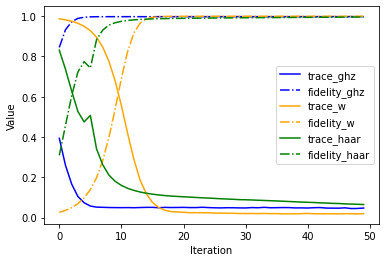

In [15]:
import pandas as pd
fidelities_ghz = pd.read_csv("../../experiments/compare_initstate/fidelities_ghz.csv", sep=",", header=None)
fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_w = pd.read_csv("../../experiments/compare_initstate/fidelities_w.csv", sep=",", header=None)
fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_haar = pd.read_csv("../../experiments/compare_initstate/fidelities_haar.csv", sep=",", header=None)
fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

traces_ghz = pd.read_csv("../../experiments/compare_initstate/traces_ghz.csv", sep=",", header=None)

traces_w = pd.read_csv("../../experiments/compare_initstate/traces_w.csv", sep=",", header=None)

traces_haar = pd.read_csv("../../experiments/compare_initstate/traces_haar.csv", sep=",", header=None)


plt.plot(traces_ghz[:50], label = 'trace_ghz', color = 'blue')
plt.plot(fidelities_ghz[:50], label = 'fidelity_ghz', linestyle = '-.', color = 'blue')
plt.plot(traces_w[:50], label = 'trace_w', color = 'orange')
plt.plot(fidelities_w[:50], label = 'fidelity_w', linestyle = '-.', color = 'orange')
plt.plot(traces_haar[:50], label = 'trace_haar', color = 'g')
plt.plot(fidelities_haar[:50], label = 'fidelity_haar', linestyle = '-.', color = 'g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity.png', format='png', dpi=600)
plt.show()
